In [ ]:
from src import UnidecInterface,make_output_folder,SpectraExtractor,get_likely_composition,get_all_differences, get_neighbour_diffs, get_stoichiometries
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import seaborn as sns

In [ ]:
load_file=r"path to your file"
output_folder="result folder name"

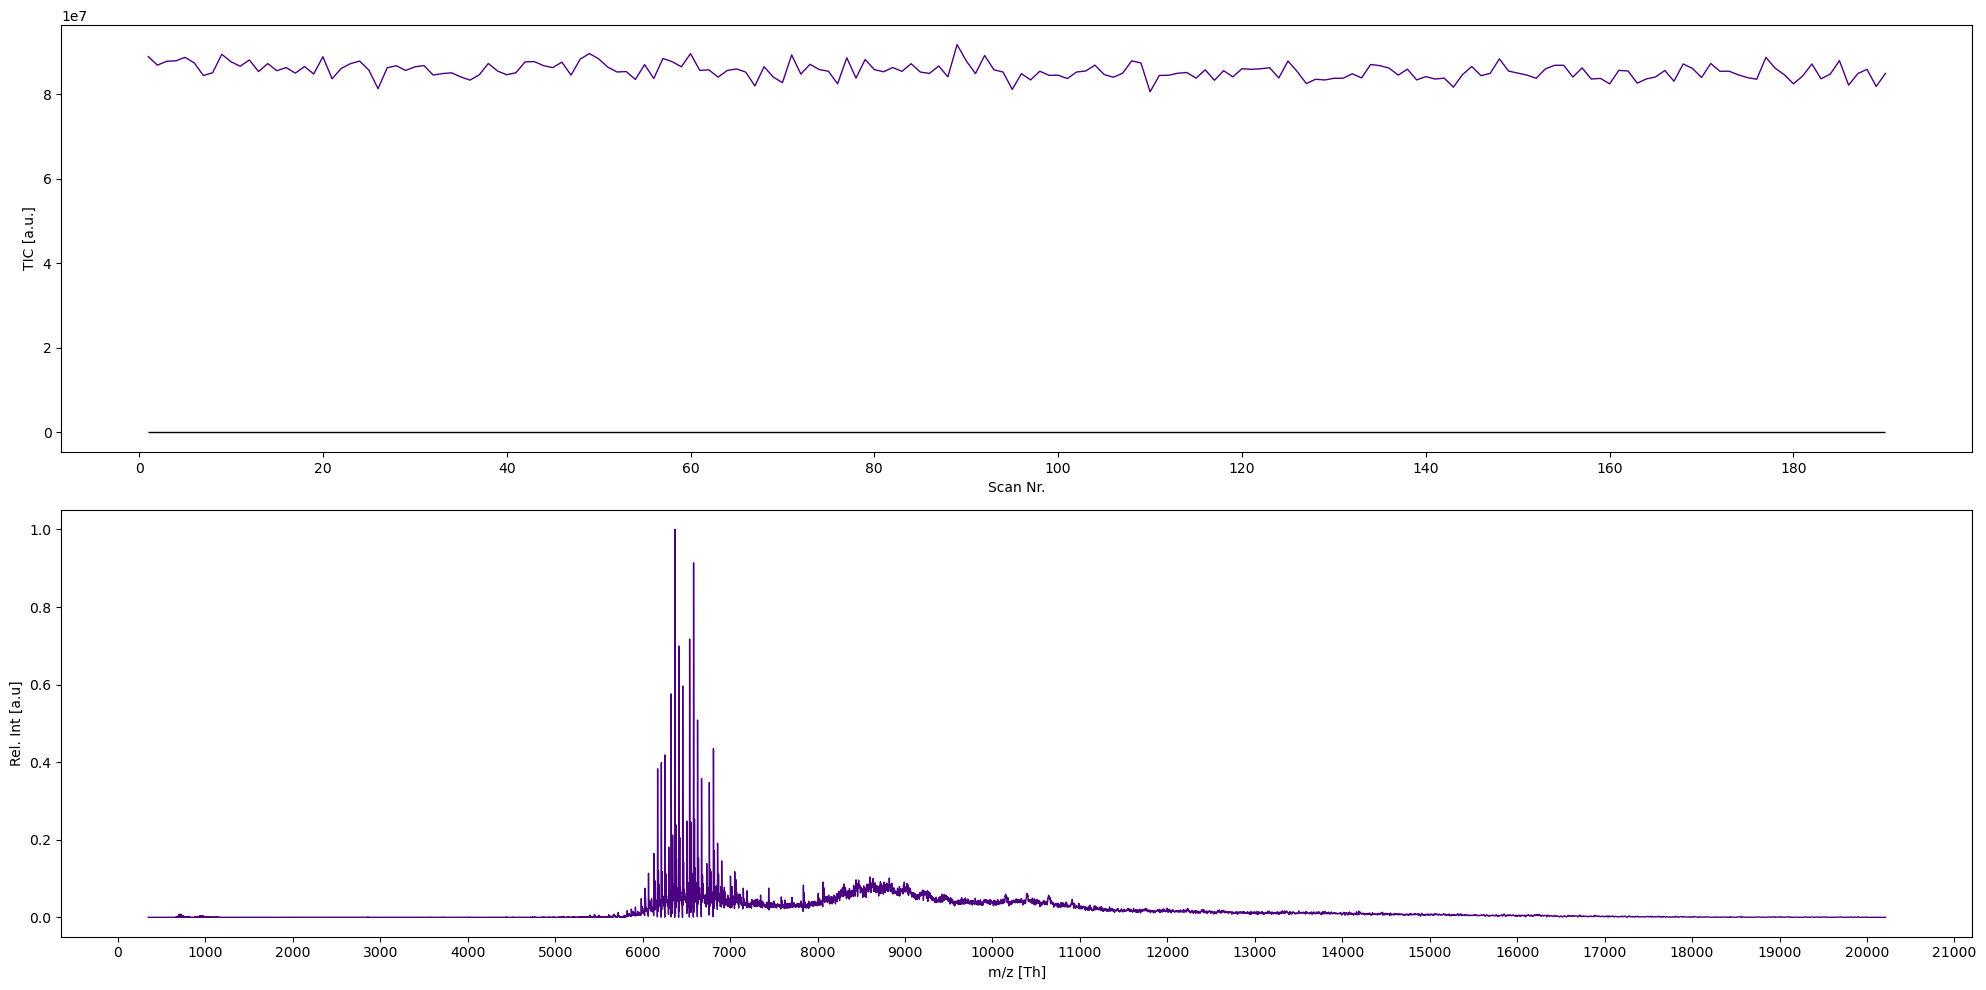

In [18]:
extractor=SpectraExtractor(load_file)

extractor.get_average_spec(
    range=None
)

fig1,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=None,ax=ax[1])
fig1.tight_layout()


In [19]:
folder=make_output_folder(
    data_in=load_file,
    folder_name=output_folder
)
fig1.savefig(f"{folder}/spectrum_wide.png",dpi=300)
extractor.save_spectrum(folder)

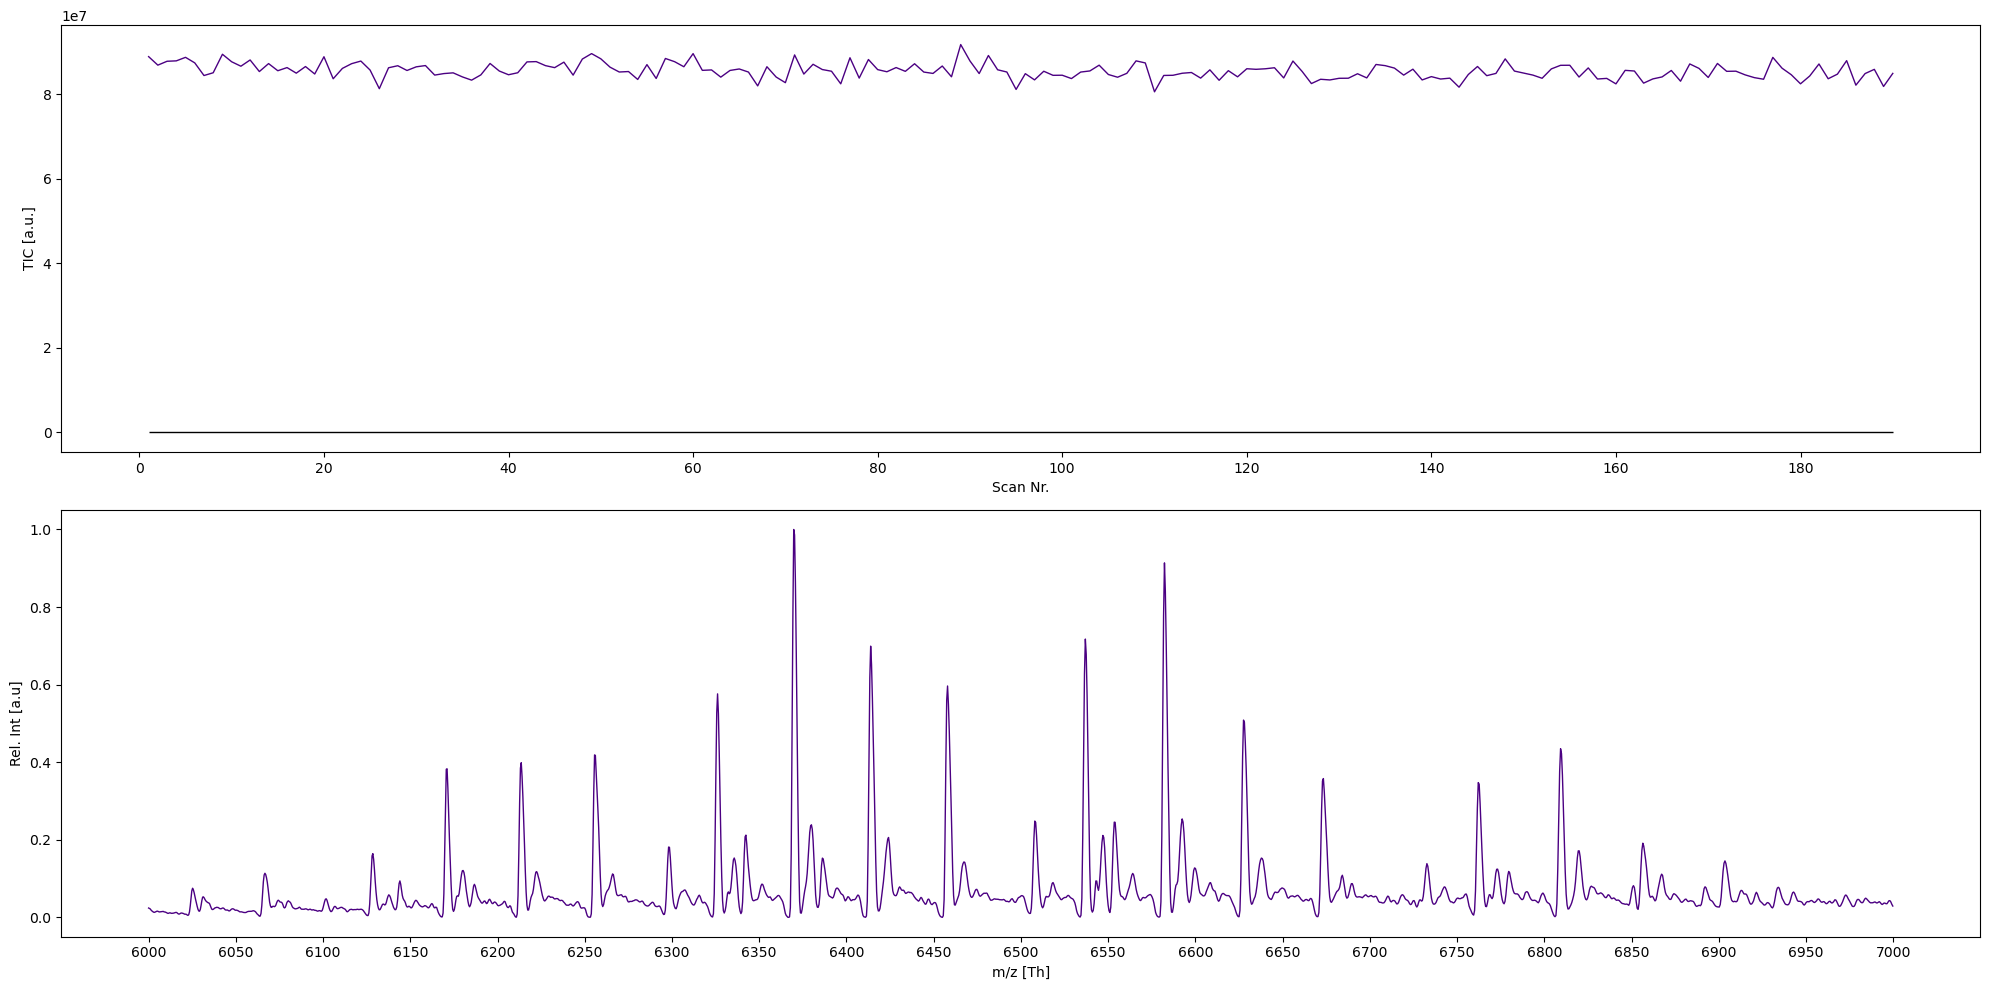

In [20]:
fig2,ax=plt.subplots(2,1, figsize=(20,10))
extractor.plot_chromatogram(plot_time=False,ax=ax[0])
extractor.plot_spectrum(zoom=[6000,7000],ax=ax[1])
fig2.tight_layout()
fig2.savefig(f"{folder}/spectrum_zoom.png",dpi=300)

In [21]:
unidec=UnidecInterface(
    data_in=glob(f"{folder}/*_selected_*")[0],
    folder_out=folder
)

unidec.run("config.txt")
unidec.load_results()
df=unidec.get_peak_df()


UniDec Engine v.6.0.4

UniDec Path: c:\Users\chem-chem1918\AppData\Local\anaconda3\envs\nativems\Lib\site-packages\unidec\bin\unidec.exe
Opening File:  ../../../Analyses/Proteasome/20250222/PA28ab_Thesis\20240917_PA28ab_3_selected__range_1-190.txt
Output Directory: c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20250222\PA28ab_Thesis
Loading Time: 0.11s
Data Prep Time: 0.036s
Automatic Peak Width: 2.49997
unidec run 0.5s
File Name:  ../../../Analyses/Proteasome/20250222/PA28ab_Thesis\20240917_PA28ab_3_selected__range_1-190.txt R Squared:  0.9742536649452426
R Squared: 0.9742536649452426
Average Peaks Score (UniScore): 0.6216170657833691
Exported data to c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenbach\Analyses\Proteasome\20250222\PA28ab_Thesis\20240917_PA28ab_3_selected__range_1-190_unidec_chargedata.dat
Exported data to c:\Users\chem-chem1918\OneDrive\Documents\2_Master\5_Labrotations\AK-Rauschenb

Mass,MassStdGuess,Area,MassCentroid,DScore
196080.0,74.6,48.4,196084.6,0.5
197440.0,75.7,100.0,197445.1,0.7
198810.0,76.2,58.2,198809.3,0.6
200170.0,76.9,56.2,200169.7,0.6


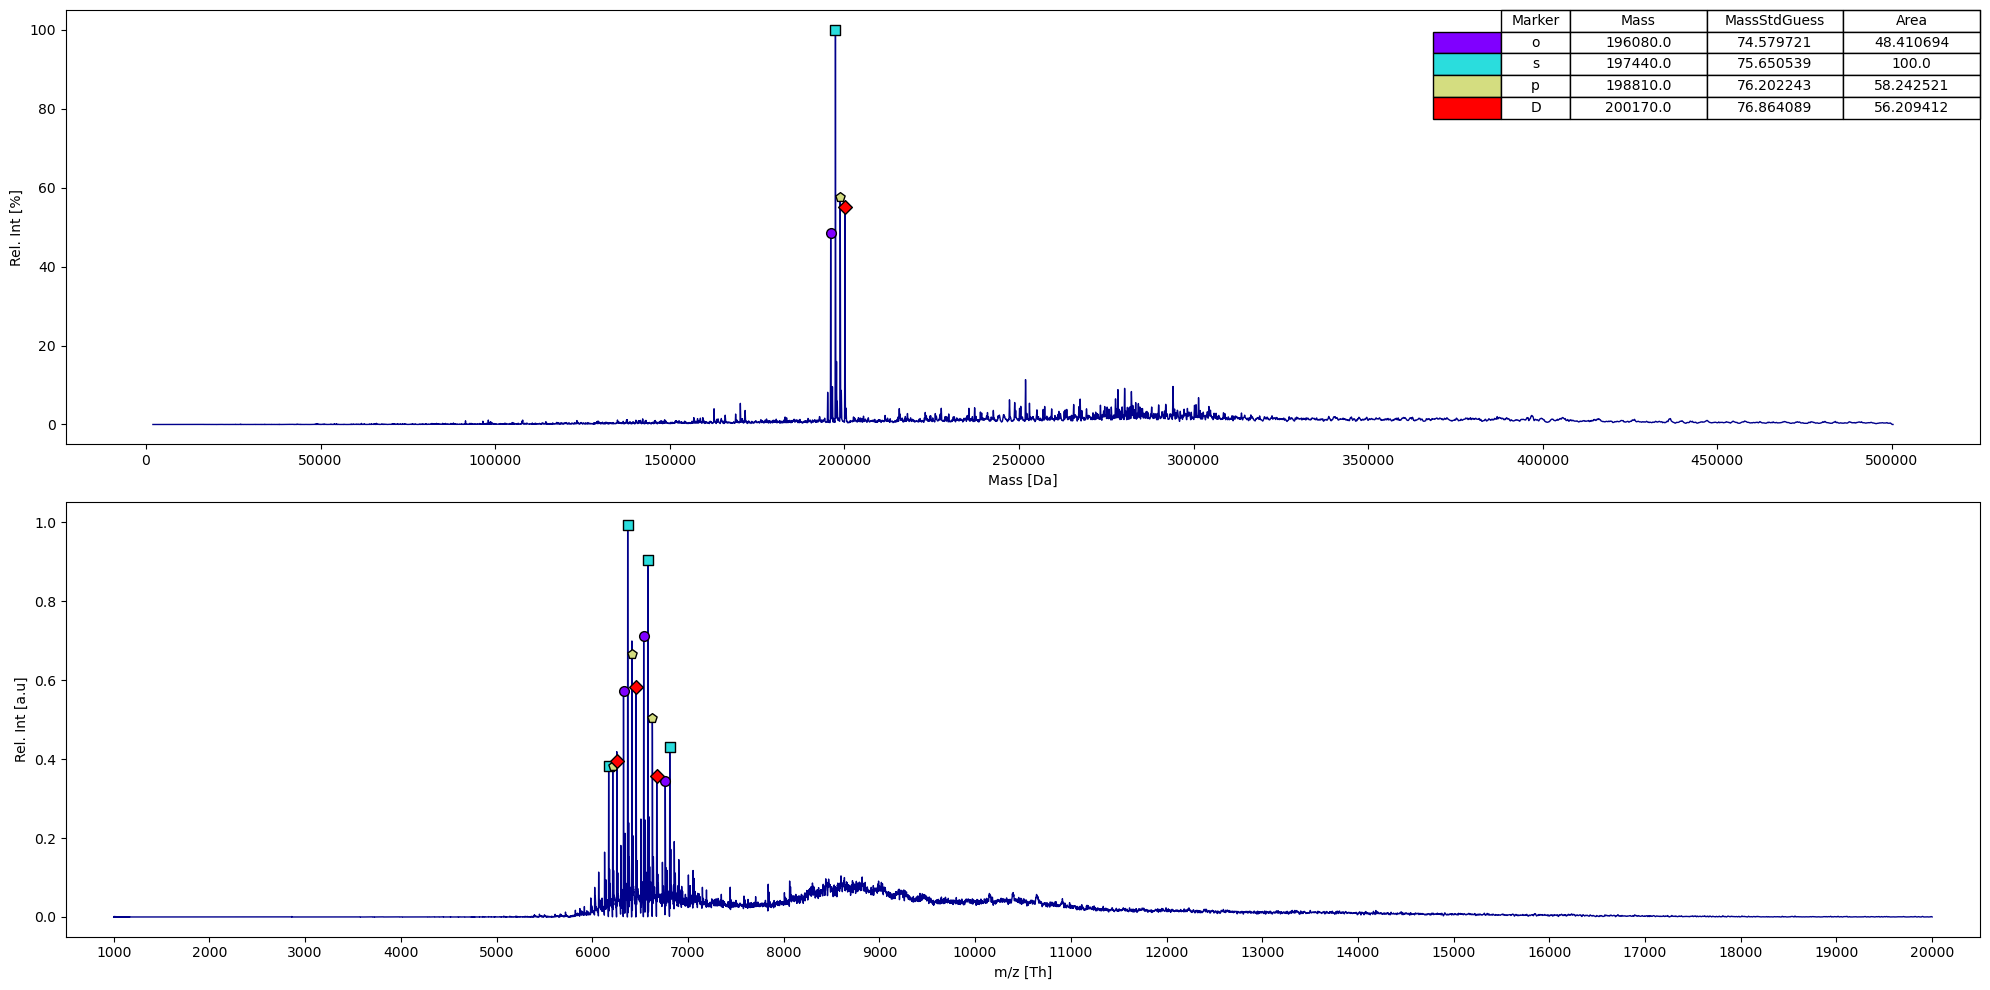

In [22]:
fig3,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=None
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=None,
    threshold=0.2
)

unidec.plot_table(ax[0])
fig3.tight_layout()
fig3.savefig(f"{folder}/unidec_results_wide.png",dpi=300)

df.drop(columns=["AvgCharge","StdDevCharge","Height","MassFWHM","MassErrorBetweenZ","Marker"]).style.hide(axis='index').format(precision=1)

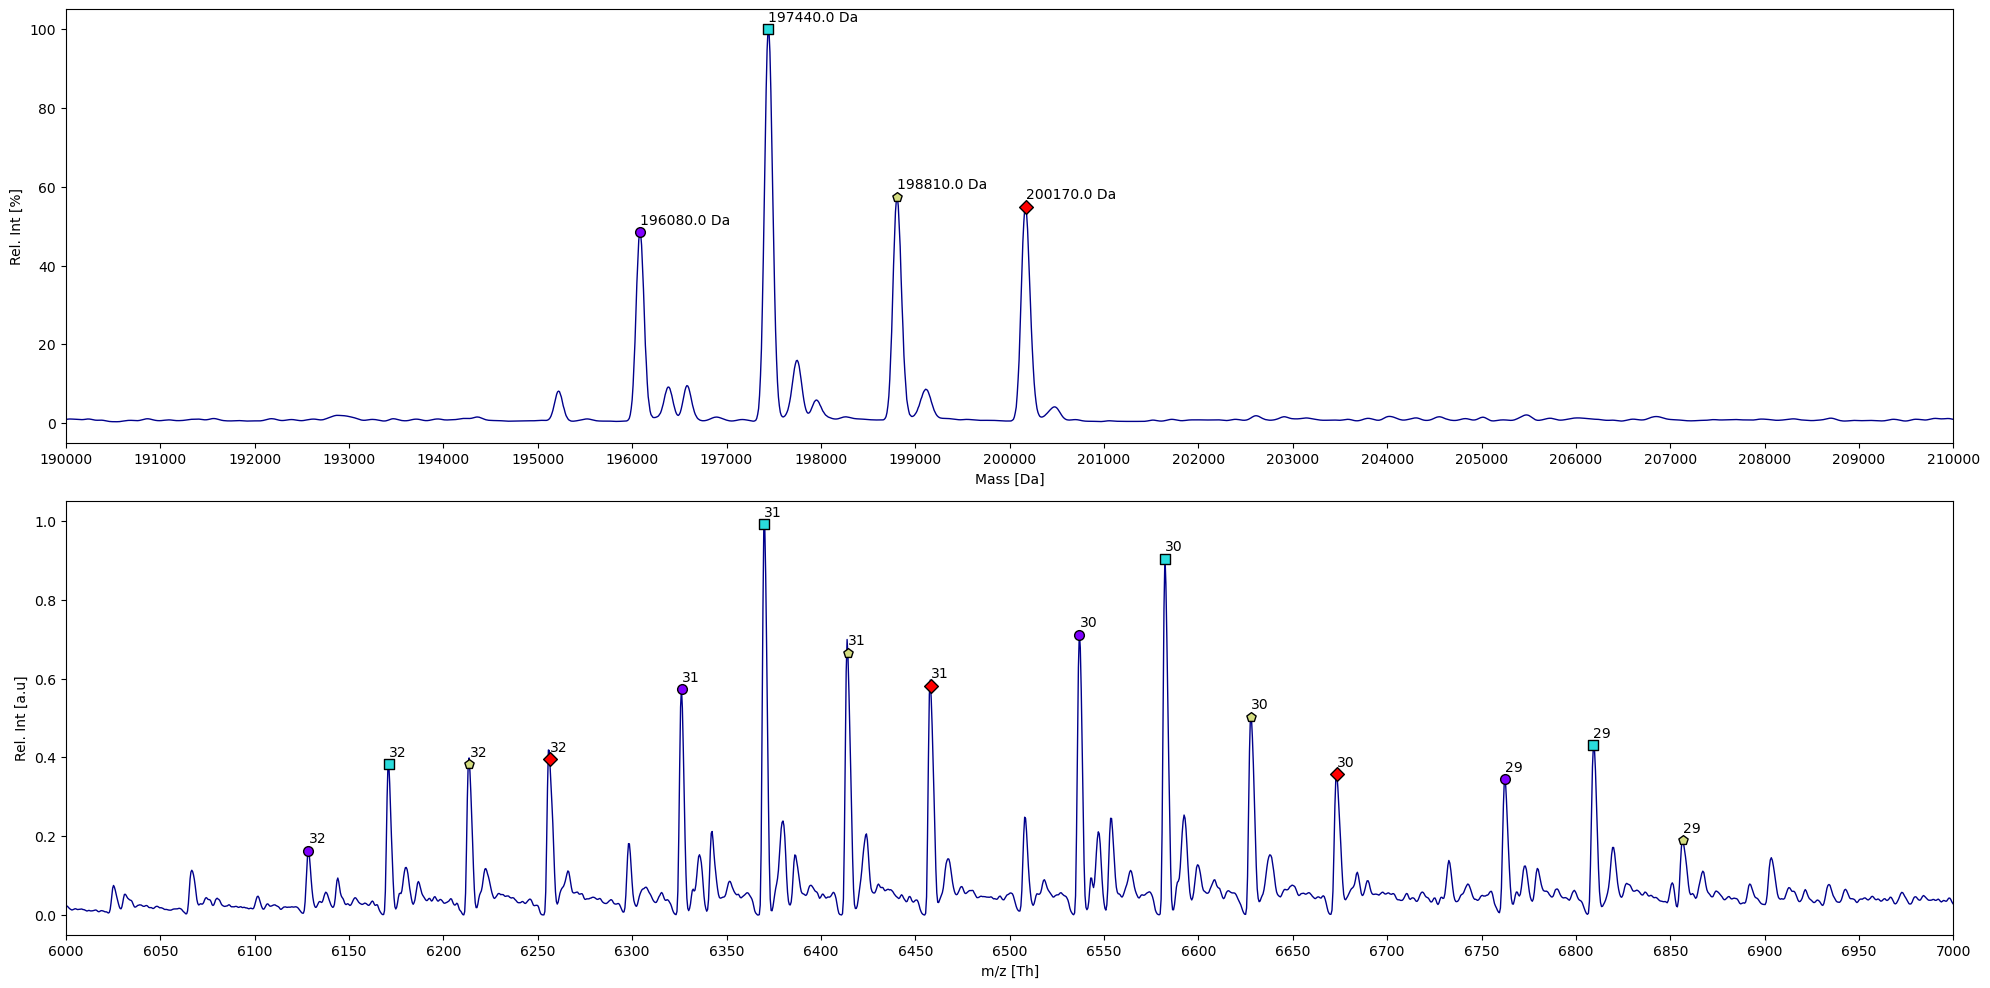

In [30]:
fig4,ax=plt.subplots(2,1, figsize=(20,10))
unidec.plot_mass_data(
    ax=ax[0],
    zoom=[190000,210000],
    display_masses=True
)
unidec.plot_mz_data(
    ax=ax[1],
    zoom=[6000,7000],
    threshold=0.15,
    display_charges=True
)

#unidec.plot_table(ax[0])
fig4.tight_layout()
fig4.savefig(f"{folder}/unidec_results_zoom.png",dpi=300)


In [26]:
stoichiometries=get_stoichiometries(
    df=df,
    mass_array=[28592,27232,625],
    no_subunits=14,
    max_multiplicates=7
)

stoichiometries[(stoichiometries["Mass"]>195000)&(stoichiometries["Mass"]<205000)]

,28592,27232,625,sum,diff,Mass_i,Mass
0,4.0,3.0,0.0,196064.0,16.0,0.0,196080.0
1,5.0,2.0,0.0,197424.0,16.0,1.0,197440.0
2,6.0,1.0,0.0,198784.0,26.0,2.0,198810.0
3,7.0,0.0,0.0,200144.0,26.0,3.0,200170.0
